In [176]:
import pandas as pd
df = pd.read_csv('food_booking.csv')
df

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,18/05/2016 18:53,House Red wine 75cl,2,17.95,7
74814,2503,14/05/2016 19:28,House Red wine 75cl,2,17.95,6
74815,2467,10/05/2016 13:18,House Red wine 75cl,2,17.95,9
74816,2249,07/04/2016 19:04,House white wine 75cl,1,17.95,6


In [177]:
df['Item Name'].mode()

0    Pilau Rice
Name: Item Name, dtype: object

In [178]:
#convert to date
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [179]:
df

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,2019-03-08 20:25:00,Plain Papadum,2,0.80,6
1,16118,2019-03-08 20:25:00,King Prawn Balti,1,12.95,6
2,16118,2019-03-08 20:25:00,Garlic Naan,1,2.95,6
3,16118,2019-03-08 20:25:00,Mushroom Rice,1,3.95,6
4,16118,2019-03-08 20:25:00,Paneer Tikka Masala,1,8.95,6
...,...,...,...,...,...,...
74813,2518,2016-05-18 18:53:00,House Red wine 75cl,2,17.95,7
74814,2503,2016-05-14 19:28:00,House Red wine 75cl,2,17.95,6
74815,2467,2016-10-05 13:18:00,House Red wine 75cl,2,17.95,9
74816,2249,2016-07-04 19:04:00,House white wine 75cl,1,17.95,6


In [180]:
df['total_price'] = df['Quantity'] * df['Product Price'] 

In [181]:
df['hours'] = df['Order Date'].dt.hour


In [182]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df['month'] = pd.DatetimeIndex(df['Order Date']).month
df['day'] = pd.DatetimeIndex(df['Order Date']).day


In [183]:
#1 total revenue
total_revenue = df['total_price'].sum()
print(total_revenue)

446517.45


In [184]:
#2,3 monthly average revenue
revenue_by_month = df.groupby((df['month']))['total_price'].mean()

revenue_by_day = df.groupby((df['day']))['total_price'].mean()

revenue_by_year = df.groupby((df['year']))['total_price'].mean()



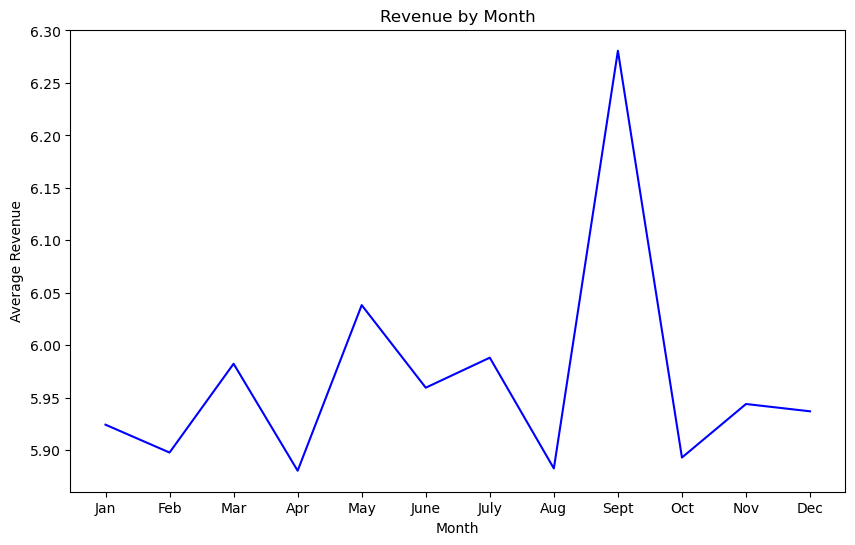

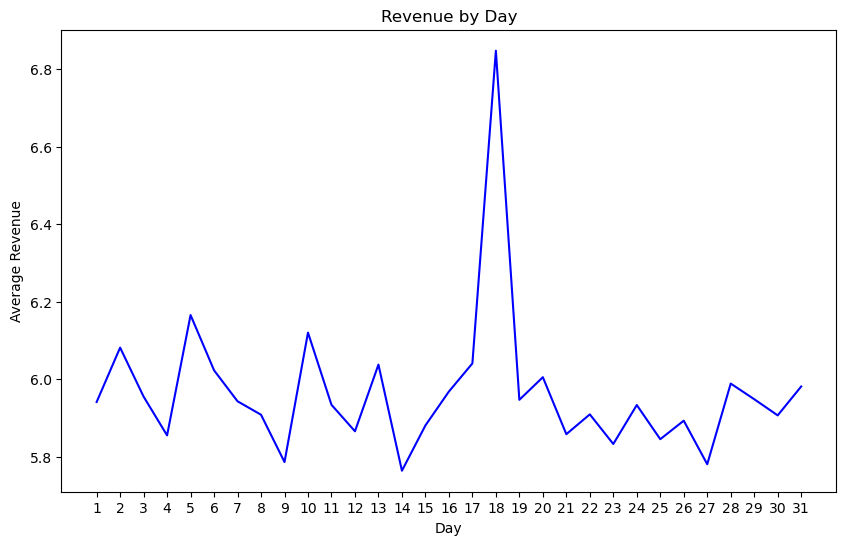

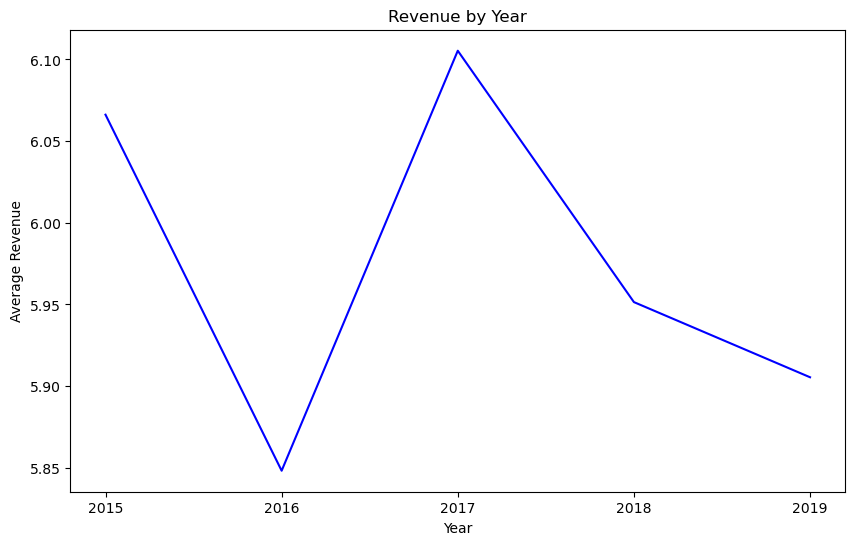

In [265]:
import matplotlib.pyplot as plt
import numpy as np

revenue_by_month = df.groupby(df['month'])['total_price'].mean()
revenue_by_day = df.groupby(df['day'])['total_price'].mean()
revenue_by_year = df.groupby(df['year'])['total_price'].mean()
revenue_by_hour = df.groupby(df['hours'])['total_price'].mean()

# Plotting revenue by month
plt.figure(figsize=(10, 6))
x_month = np.arange(1, 13)
y_month = revenue_by_month.values
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.plot(x_month, y_month, color='b')
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(x_month, month_names)
plt.show()

# Plotting revenue by day
plt.figure(figsize=(10, 6))
x_day = np.arange(1, 32)
y_day = revenue_by_day.values
plt.plot(x_day, y_day, color='b')
plt.title('Revenue by Day')
plt.xlabel('Day')
plt.ylabel('Average Revenue')
plt.xticks(range(1,32))
plt.show()



# Plotting revenue by year
plt.figure(figsize=(10, 6))
x_year = np.arange(len(revenue_by_year))
y_year = revenue_by_year.values
plt.plot(x_year, y_year, color='b')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Revenue')
plt.xticks(x_year, revenue_by_year.index)
plt.show()



In [186]:

#
item = df['Item Name'].mode()

In [187]:
df

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,total_price,hours,year,month,day
0,16118,2019-03-08 20:25:00,Plain Papadum,2,0.80,6,1.60,20,2019,3,8
1,16118,2019-03-08 20:25:00,King Prawn Balti,1,12.95,6,12.95,20,2019,3,8
2,16118,2019-03-08 20:25:00,Garlic Naan,1,2.95,6,2.95,20,2019,3,8
3,16118,2019-03-08 20:25:00,Mushroom Rice,1,3.95,6,3.95,20,2019,3,8
4,16118,2019-03-08 20:25:00,Paneer Tikka Masala,1,8.95,6,8.95,20,2019,3,8
...,...,...,...,...,...,...,...,...,...,...,...
74813,2518,2016-05-18 18:53:00,House Red wine 75cl,2,17.95,7,35.90,18,2016,5,18
74814,2503,2016-05-14 19:28:00,House Red wine 75cl,2,17.95,6,35.90,19,2016,5,14
74815,2467,2016-10-05 13:18:00,House Red wine 75cl,2,17.95,9,35.90,13,2016,10,5
74816,2249,2016-07-04 19:04:00,House white wine 75cl,1,17.95,6,17.95,19,2016,7,4


In [218]:
uni = df['Order Number'].nunique()
uni

13397

In [223]:
#Popular item on the menu
item = df['Item Name'][df['Quantity']].mode()
print(item)

0    King Prawn Balti
Name: Item Name, dtype: object


In [222]:
q = df[df['Item Name']== 'King Prawn Balti']
q

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,total_price,hours,year,month,day,Year,Quarter
1,16118,2019-03-08 20:25:00,King Prawn Balti,1,12.95,6,12.95,20,2019,3,8,2019,1
73418,15044,2019-05-26 18:05:00,King Prawn Balti,1,12.95,7,12.95,18,2019,5,26,2019,2
73528,13766,2019-10-03 18:04:00,King Prawn Balti,1,12.95,6,12.95,18,2019,10,3,2019,4
73561,13318,2019-08-02 20:12:00,King Prawn Balti,1,12.95,4,12.95,20,2019,8,2,2019,3
73659,12300,2018-02-12 17:46:00,King Prawn Balti,1,12.95,4,12.95,17,2018,2,12,2018,1
73780,11105,2018-12-09 19:55:00,King Prawn Balti,1,12.95,4,12.95,19,2018,12,9,2018,4
73787,11029,2018-07-09 18:54:00,King Prawn Balti,1,12.95,11,12.95,18,2018,7,9,2018,3
73888,10041,2018-06-23 17:46:00,King Prawn Balti,1,12.95,4,12.95,17,2018,6,23,2018,2
73964,9413,2018-05-05 13:01:00,King Prawn Balti,1,12.95,27,12.95,13,2018,5,5,2018,2
74041,8911,2018-03-19 18:08:00,King Prawn Balti,1,12.95,9,12.95,18,2018,3,19,2018,1


In [189]:
#Sales changes over time for most popular item
popular_item = df.loc[df['Quantity'] == True, 'Item Name'].mode().values[0]
popular_item_df = df[df['Item Name'] == popular_item]
sales_by_month = popular_item_df.groupby('month')['Product Price'].sum()
sales_by_year = popular_item_df.groupby('year')['Product Price'].sum()
sales_by_days = popular_item_df.groupby('day')['Product Price'].sum()
print("Total Sales of Popular Item by Month:")
print(sales_by_month)

print("Total Sales of Popular Item by Year:")
print(sales_by_year)

print("Total Sales of Popular Item by Days:")
print(sales_by_days)


Total Sales of Popular Item by Month:
month
1     1121.00
2     1088.55
3     1241.95
4     1141.65
5     1259.65
6     1156.40
7     1295.05
8     1003.00
9     1112.15
10    1126.90
11    1073.80
12    1306.85
Name: Product Price, dtype: float64
Total Sales of Popular Item by Year:
year
2016    1917.50
2017    3846.80
2018    4855.70
2019    3306.95
Name: Product Price, dtype: float64
Total Sales of Popular Item by Days:
day
1     418.90
2     445.45
3     466.10
4     516.25
5     439.55
6     545.75
7     424.80
8     392.35
9     398.25
10    386.45
11    486.75
12    501.50
13    460.20
14    474.95
15    495.60
16    439.55
17    477.90
18    460.20
19    442.50
20    407.10
21    377.60
22    442.50
23    480.85
24    472.00
25    466.10
26    472.00
27    525.10
28    472.00
29    398.25
30    386.45
31    354.00
Name: Product Price, dtype: float64


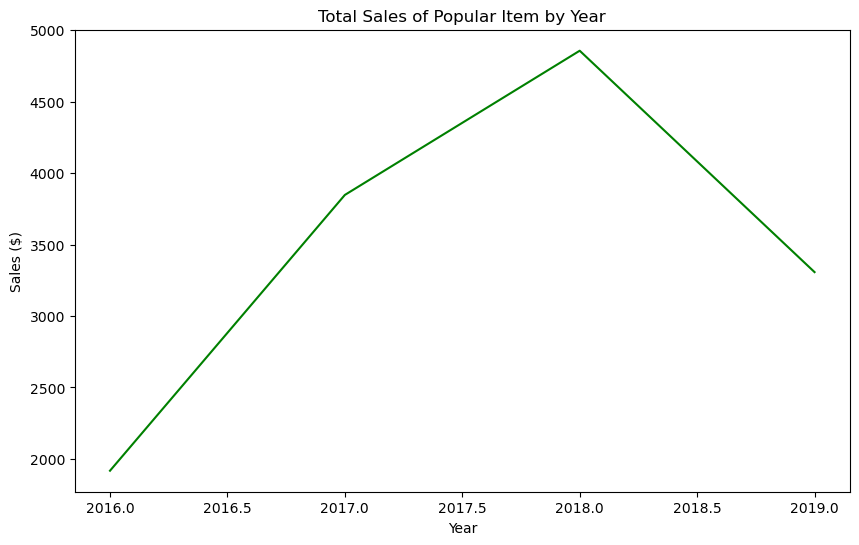

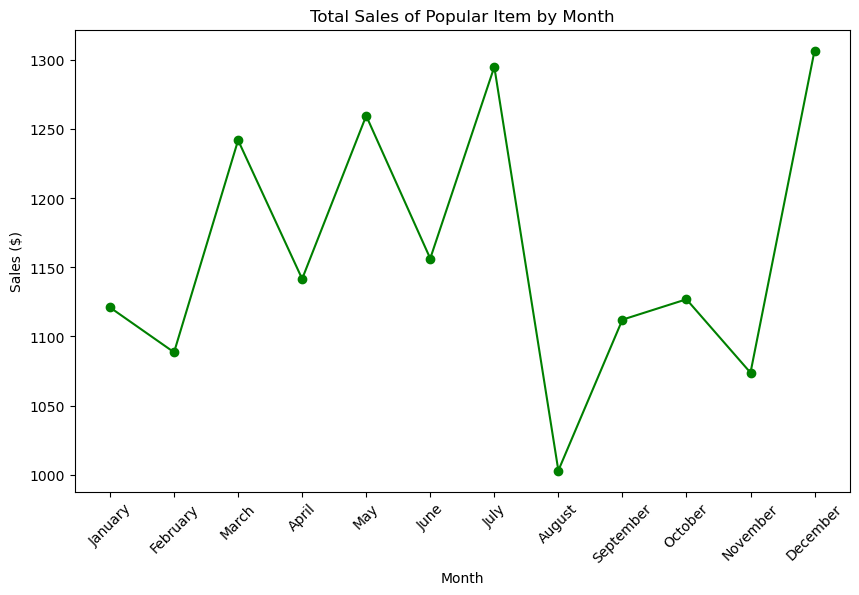

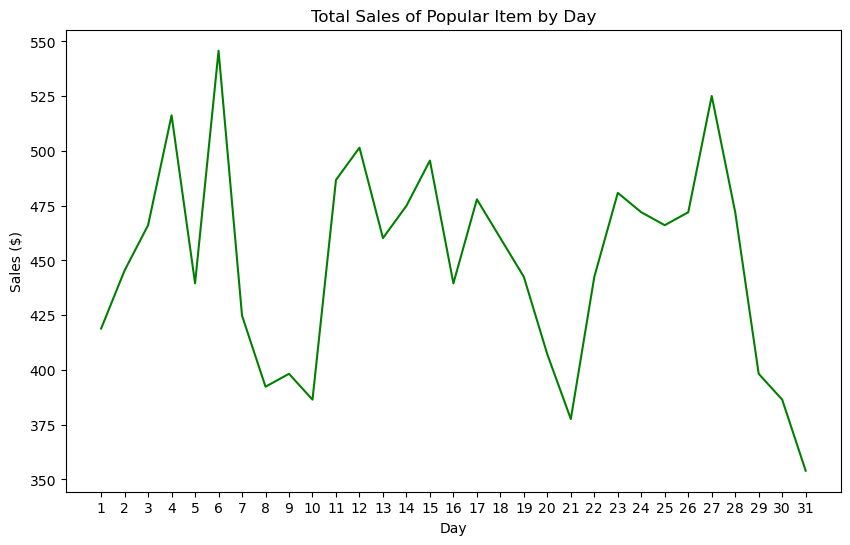

In [300]:
import matplotlib.pyplot as plt

popular_item = df.loc[df['Quantity'] == True, 'Item Name'].mode().values[0]
popular_item_df = df[df['Item Name'] == popular_item]
sales_by_month = popular_item_df.groupby('month')['Product Price'].sum()
sales_by_year = popular_item_df.groupby('year')['Product Price'].sum()
sales_by_days = popular_item_df.groupby('day')['Product Price'].sum()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month.index = [month_names[idx-1] for idx in sales_by_month.index]


# Plotting sales by year
plt.figure(figsize=(10, 6))
sales_by_year.plot(color='green')
plt.title('Total Sales of Popular Item by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.xticks(rotation=0)
plt.show()

# Plotting sales by month
plt.figure(figsize=(10, 6))
plt.plot(sales_by_month, color='green', marker='o')
plt.title('Total Sales of Popular Item by Month')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Plotting sales by day
plt.figure(figsize=(10, 6))
sales_by_days.plot(color='green')
plt.title('Total Sales of Popular Item by Day')
plt.xlabel('Day')
plt.ylabel('Sales ($)')
plt.xticks(range(1, 32))
plt.show()


In [225]:
#Total quantity of items ordered
total_qua = df['Quantity'].sum()
print(total_qua)

93041


In [269]:
#Item with highest price
high_price = df['Product Price'].max()
item_name = df.loc[df['Product Price'] == high_price, 'Item Name'].values[0]


print("Name of item:", item_name)
print("Price:$",high_price)



Name of item: House white wine 75cl
Price:$ 17.95


In [273]:
import itertools
from collections import Counter

# Group the data by 'Order Number' and create a list of items for each order
order_groups = df.groupby('Order Number', group_keys=False)['Item Name'].apply(list)

# Create a Counter to store the counts of each pair of items
pair_counts = Counter()

# Iterate over each order group
for items in order_groups:
    # Generate all possible pairs of items within the order
    pairs = list(itertools.combinations(items, 2))
    
    # Update the count of each pair of items
    pair_counts.update(pairs)

# Find the top 5 pairs that appear most frequently
top_pairs = pair_counts.most_common(5)

# Print the top 5 frequently bought together items
print("Top 5 Items Frequently Bought Together:")
for pair, frequency in top_pairs:
    item1, item2 = pair
    print(f"{item1} and {item2}: Frequency = {frequency}")





Top 5 Items Frequently Bought Together:
Plain Papadum and Pilau Rice: Frequency = 1780
Plain Naan and Pilau Rice: Frequency = 1729
Mango Chutney and Plain Papadum: Frequency = 1510
Plain Papadum and Plain Naan: Frequency = 1136
Pilau Rice and Chicken Tikka Masala: Frequency = 1133


In [275]:
# least bought items
from collections import Counter

# Count the occurrences of each item
item_counts = Counter(df['Item Name'])

# Find the top 5 least bought items
least_bought_items = item_counts.most_common()[:-6:-1]

# Print the top 5 least bought items
print("Top 5 Least Bought Items:")
for item, frequency in least_bought_items:
    print(f"{item}: Frequency = {frequency}")



Top 5 Least Bought Items:
Kurma: Frequency = 1
Lamb Persian: Frequency = 1
Mushroom - Prawn: Frequency = 1
Tandoori Chicken: Frequency = 1
Chicken Chaat Main: Frequency = 1


In [226]:
# Average quantity per orders
average_quantity = df.groupby('Order Number')['Quantity'].mean()

# Print the result
print("Average Quantity per Order:")
print(average_quantity.max())

Average Quantity per Order:
51.0


In [301]:
#Average money spent in each order 
ave_order = df.groupby('Order Number')['total_price'].sum()
print('$',ave_order.mean())


$ 33.329659625289246


In [298]:
#Order placed in a quarter

# Convert the 'order_date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Specify the specific quarter of interest
specific_year = 2015  # Replace with the desired year
specific_quarter = 1  # Replace with the desired quarter (1, 2, 3, 4)

# Filter the DataFrame for the specific quarter
quarter_df = df[(df['Order Date'].dt.year == specific_year) & (df['Order Date'].dt.quarter == specific_quarter)]

# Count the number of orders in the specific quarter
number_of_orders = len(quarter_df)

print("Number of Orders in Specific Quarter:", number_of_orders)



Number of Orders in Specific Quarter: 40


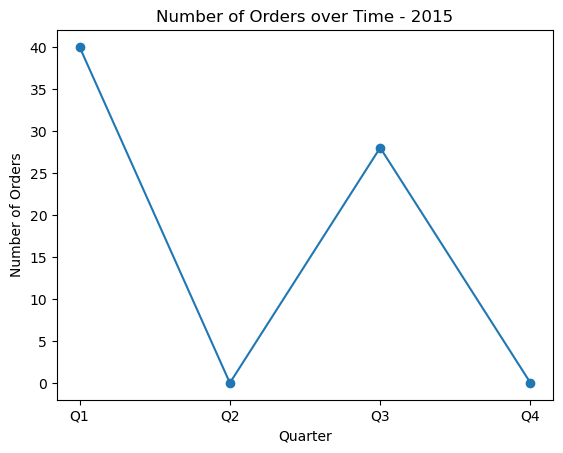

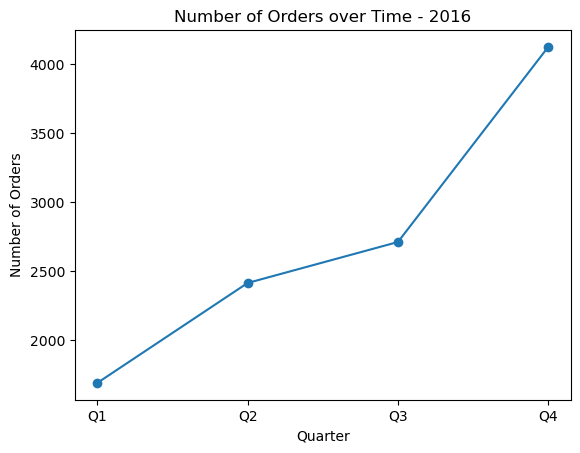

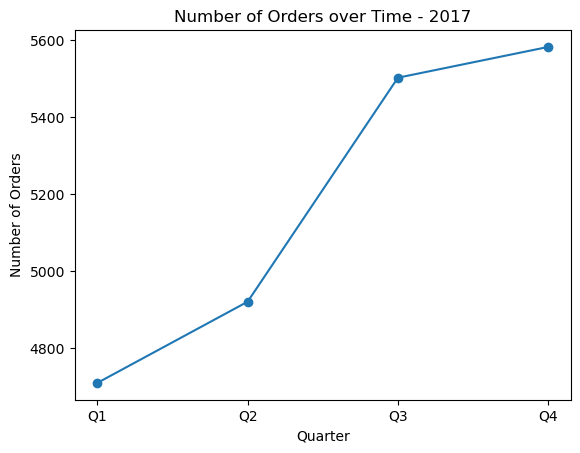

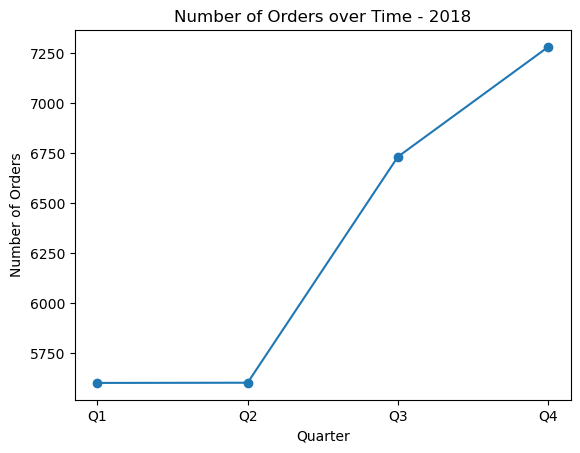

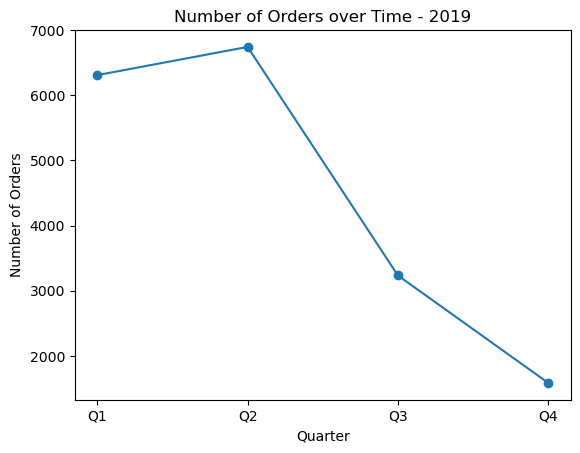

In [313]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
years = [2015, 2016, 2017, 2018, 2019]

for specific_year in years:
    year_df = df[df['Order Date'].dt.year == specific_year]
    quarterly_orders = year_df.groupby(year_df['Order Date'].dt.quarter).size()
    quarterly_orders = quarterly_orders.reindex(range(1, 5), fill_value=0)
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']
    plt.plot(quarters, quarterly_orders, marker='o')

    # Set the labels and title of the line graph
    plt.xlabel('Quarter')
    plt.ylabel('Number of Orders')
    plt.title(f'Number of Orders over Time - {specific_year}')

    # Display the line graph
    plt.show()

In [282]:
#Order placed in a year
import pandas as pd

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Calculate the number of orders for each year
orders_by_year = df.groupby('Year').size().reset_index(name='Number of Orders')

# Print the number of orders for each year
print("Number of Orders for Each Year:")
print(orders_by_year)


Number of Orders for Each Year:
   Year  Number of Orders
0  2015                68
1  2016             10940
2  2017             20717
3  2018             25220
4  2019             17873


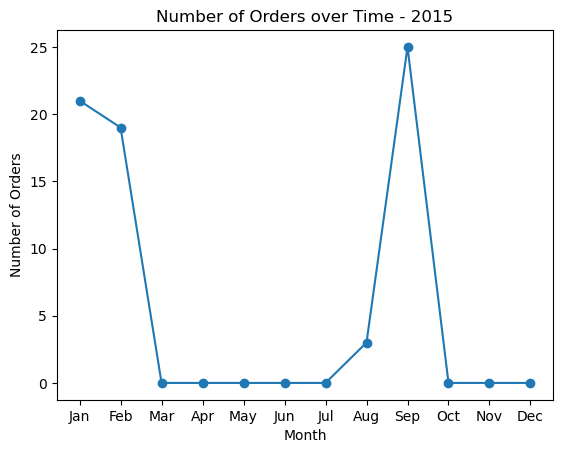

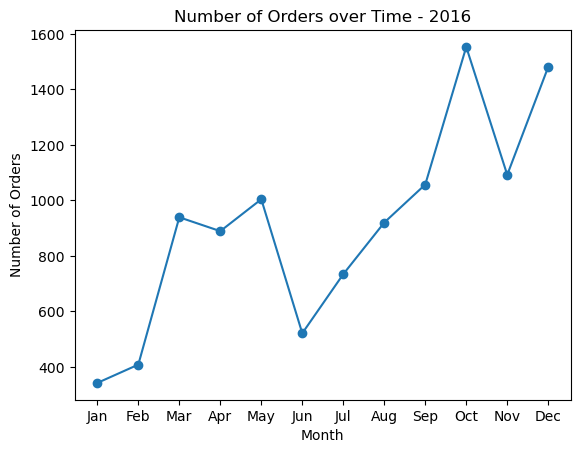

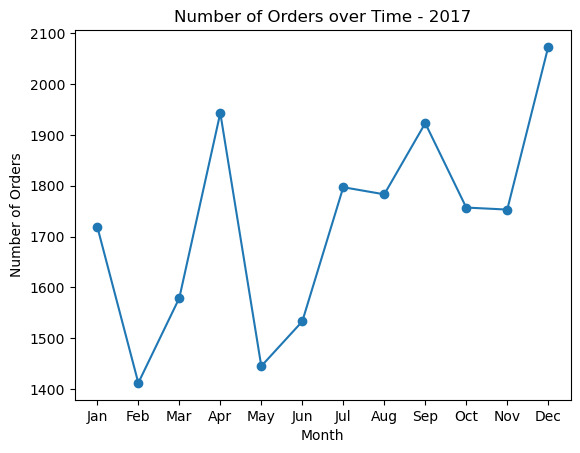

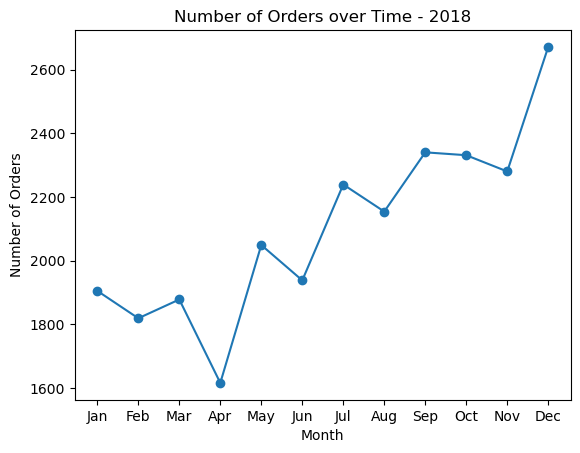

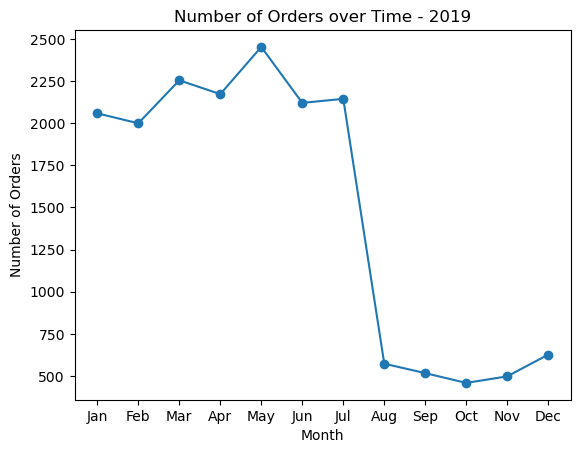

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'order_date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
years = [2015,2016,2017,2018, 2019]
for i in years:
    # Specify the specific year
    specific_year = i  # Replace with the desired year (2015, 2016, 2017, 2018, 2019)

    # Filter the DataFrame for the specific year
    year_df = df[df['Order Date'].dt.year == specific_year]

    # Group the data by month and count the number of orders in each month
    monthly_orders = year_df.groupby(year_df['Order Date'].dt.month).size()

    # Reindex to include all months and fill missing months with zero sales
    monthly_orders = monthly_orders.reindex(range(1, 13), fill_value=0)

    # Create a line graph to visualize the number of orders over time
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.plot(months, monthly_orders, marker='o')

    # Set the labels and title of the line graph
    plt.xlabel('Month')
    plt.ylabel('Number of Orders')
    plt.title(f'Number of Orders over Time - {specific_year}')

    # Display the line graph
    plt.show()


In [246]:
#total order placed each year 
ave_order_year = df.groupby('year')['Quantity'].sum()
print(ave_order_year)


year
2015       80
2016    13496
2017    26112
2018    31239
2019    22114
Name: Quantity, dtype: int64


In [283]:
#total sales for each year
import pandas as pd

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Calculate the total sales for each year
sales_by_year = df.groupby('Year')['Product Price'].sum().reset_index()

# Print the total sales for each year
print("Total Sales for Each Year:")
print(sales_by_year)


Total Sales for Each Year:
   Year  Product Price
0  2015         353.10
1  2016       57205.25
2  2017      110157.85
3  2018      134138.45
4  2019       93670.10


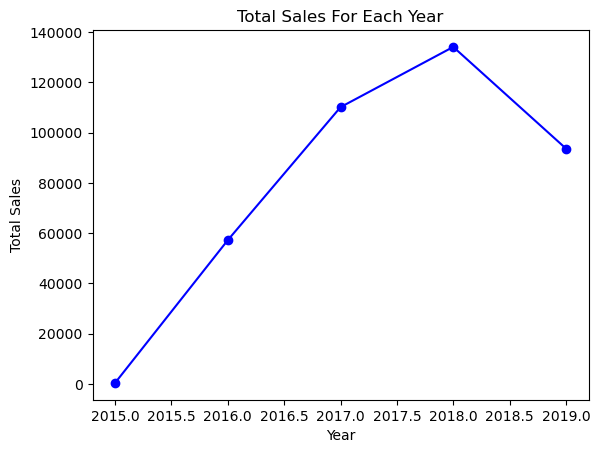

In [285]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group the data by year and calculate the total sales for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Product Price'].sum()

# Create a line graph to visualize the total sales by year
plt.plot(yearly_sales.index, yearly_sales, marker='o', color='blue')

# Set the labels and title of the line graph
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales For Each Year')

# Display the line graph
plt.show()


In [289]:
#Sales per month
# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Specify the specific year of interest
specific_year = 2015  # Replace with the desired year

# Filter the DataFrame for the specific year
year_df = df[df['Order Date'].dt.year == specific_year]

# Group the data by month and calculate the total sales for each month
monthly_sales = year_df.groupby(year_df['Order Date'].dt.month)['Product Price'].sum()

print("Sales per Month in Specific Year:")
print(monthly_sales)



Sales per Month in Specific Year:
Order Date
1    103.60
2    113.90
8     11.85
9    123.75
Name: Product Price, dtype: float64


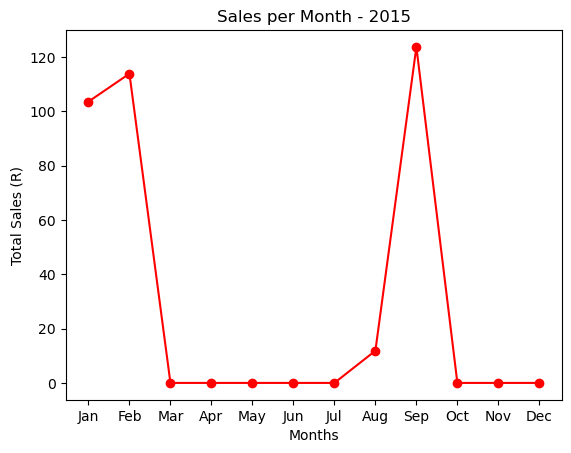

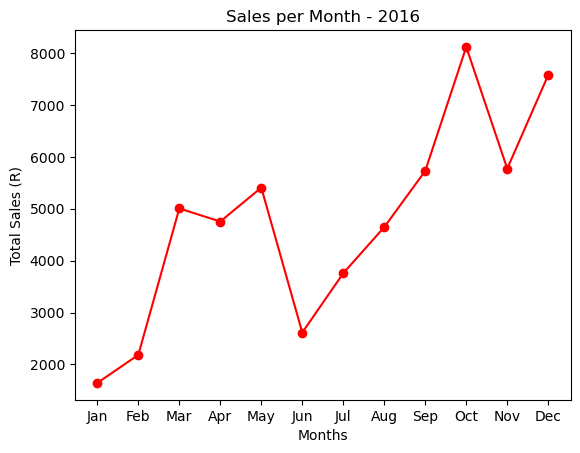

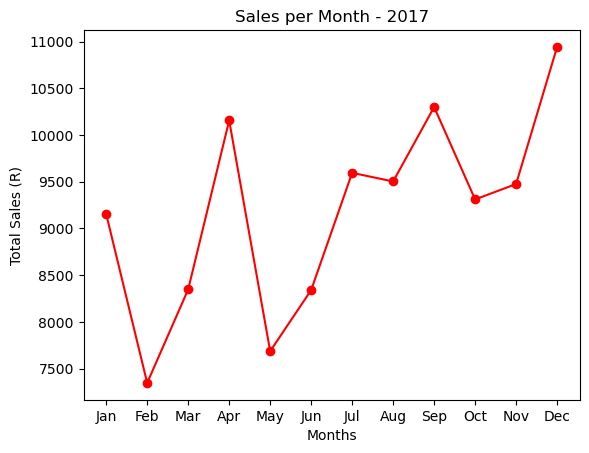

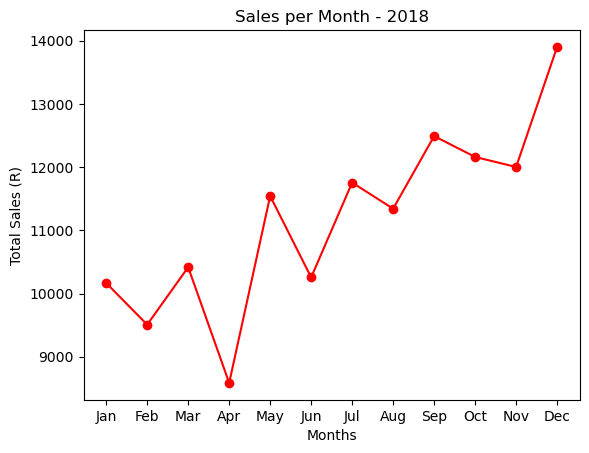

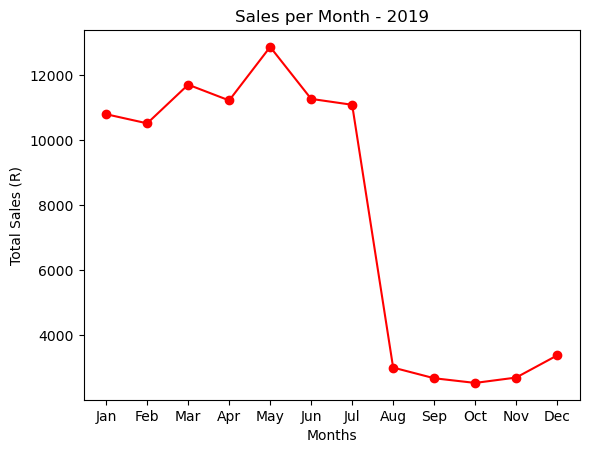

In [288]:
import matplotlib.pyplot as plt

# Convert the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
years = [2015, 2016, 2017, 2018, 2019]
for i in years:
    # Specify the specific year of interest
    specific_year = i  # Replace with the desired year

    # Filter the DataFrame for the specific year
    year_df = df[df['Order Date'].dt.year == specific_year]

    # Group the data by month and calculate the total sales for each month
    monthly_sales = year_df.groupby(year_df['Order Date'].dt.month)['Product Price'].sum()

    # Reindex to include all months and fill missing months with zero sales
    monthly_sales = monthly_sales.reindex(range(1, 13), fill_value=0)

    # Create a line graph to visualize the sales per month
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.plot(months, monthly_sales, marker='o', color='red')

    # Set the labels and title of the line graph
    plt.xlabel('Months')
    plt.ylabel('Total Sales (R)')
    plt.title(f'Sales per Month - {specific_year}')

    # Display the line graph
    plt.show()


In [207]:
#Total Sales and orders for all years
# Calculate the total sales for all years combined
total_sales = df['total_price'].sum()

# Count the number of orders for all years combined
total_orders = len(df)

print("Total Sales for All Years Combined:", total_sales)
print("Total Orders for All Years Combined:", total_orders)


Total Sales for All Years Combined: 446517.45
Total Orders for All Years Combined: 74818


In [208]:
#Sales in a specific quarter
# Assuming 'order_date' is a column in your DataFrame representing the order dates

# Convert the 'order_date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Specify the specific quarter of interest
specific_year = 2015  # Replace with the desired year
specific_quarter = 1  # Replace with the desired quarter (1, 2, 3, 4)

# Filter the DataFrame for the specific quarter
quarter_df = df[(df['Order Date'].dt.year == specific_year) & (df['Order Date'].dt.quarter == specific_quarter)]

# Count the number of orders in the specific quarter
sales_qua = quarter_df['Product Price'].sum()

print("sales in Specific Quarter:", sales_qua)

sales in Specific Quarter: 217.5


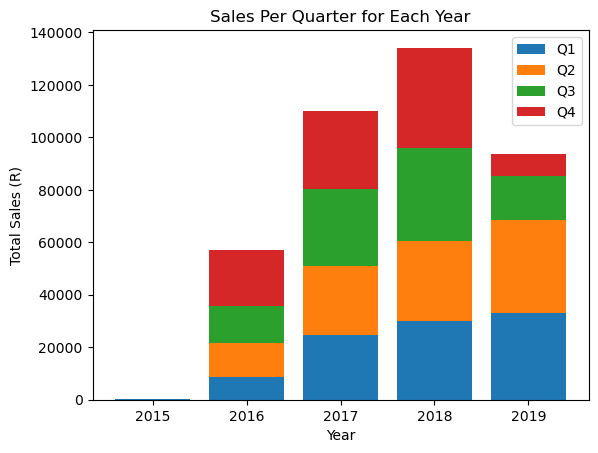

In [209]:
import matplotlib.pyplot as plt


# Convert the 'order_date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract the year and quarter from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

# Group the data by year and quarter and calculate the total sales
quarterly_sales = df.groupby(['Year', 'Quarter'])['Product Price'].sum().reset_index(name='Sales')

# Pivot the DataFrame to have quarters as columns and years as index
sales_pivot = quarterly_sales.pivot(index='Year', columns='Quarter', values='Sales').fillna(0)

# Get the list of years
years = sales_pivot.index.tolist()

# Get the list of quarters
quarters = sales_pivot.columns.tolist()

# Create a stacked bar graph
plt.bar(years, sales_pivot[1], label='Q1')
plt.bar(years, sales_pivot[2], bottom=sales_pivot[1], label='Q2')
plt.bar(years, sales_pivot[3], bottom=sales_pivot[1] + sales_pivot[2], label='Q3')
plt.bar(years, sales_pivot[4], bottom=sales_pivot[1] + sales_pivot[2] + sales_pivot[3], label='Q4')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Total Sales (R)')

# Set the title of the graph
plt.title('Sales Per Quarter for Each Year')

# Set the legend
plt.legend()

# Display the stacked bar graph
plt.show()
